In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from keras.applications import Xception

conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(299,299,3))

Using TensorFlow backend.


In [2]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(133,activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               104858112 
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 125,787,821
Trainable params: 125,733,293
Non-trainable params: 54,528
_________________________________________________________________


In [5]:
conv_base.trainable = False

In [6]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './dogImages'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(299, 299),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(299, 299),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.


In [9]:
from keras.callbacks import ModelCheckpoint 
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

checkpointer = ModelCheckpoint(filepath='dogsImages.pretrained.augmentation.model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=334,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=42, 
      callbacks=[checkpointer], 
      verbose=2)


Epoch 1/30
 - 2468s - loss: 1.1443 - acc: 0.6985 - val_loss: 0.5829 - val_acc: 0.8156

Epoch 00001: val_loss improved from inf to 0.58294, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 2/30
 - 2104s - loss: 0.8758 - acc: 0.7542 - val_loss: 0.4949 - val_acc: 0.8431

Epoch 00002: val_loss improved from 0.58294 to 0.49491, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 3/30
 - 1405s - loss: 0.7640 - acc: 0.7894 - val_loss: 0.4917 - val_acc: 0.8587

Epoch 00003: val_loss improved from 0.49491 to 0.49173, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 4/30
 - 1214s - loss: 0.7184 - acc: 0.8094 - val_loss: 0.4529 - val_acc: 0.8599

Epoch 00004: val_loss improved from 0.49173 to 0.45293, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 5/30
 - 1180s - loss: 0.6656 - acc: 0.8163 - val_loss: 0.4326 - val_acc: 0.8707

Epoch 00005: val_loss improved from 0.45293 t

KeyboardInterrupt: 

In [10]:
model.load_weights('dogsImages.pretrained.augmentation.model.weights.best.hdf5')

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

In [12]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block14_sepconv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [14]:
from keras.callbacks import ModelCheckpoint 
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

checkpointer = ModelCheckpoint(filepath='dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=334,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=42, 
      callbacks=[checkpointer], 
      verbose=2)

Epoch 1/15
 - 1073s - loss: 0.5905 - acc: 0.8316 - val_loss: 0.5048 - val_acc: 0.8575

Epoch 00001: val_loss improved from inf to 0.50483, saving model to dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5
Epoch 2/15
 - 1286s - loss: 0.4694 - acc: 0.8627 - val_loss: 0.4594 - val_acc: 0.8623

Epoch 00002: val_loss improved from 0.50483 to 0.45940, saving model to dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5
Epoch 3/15
 - 1107s - loss: 0.3742 - acc: 0.8822 - val_loss: 0.4728 - val_acc: 0.8659

Epoch 00003: val_loss did not improve from 0.45940
Epoch 4/15
 - 1169s - loss: 0.3525 - acc: 0.8958 - val_loss: 0.4493 - val_acc: 0.8647

Epoch 00004: val_loss improved from 0.45940 to 0.44933, saving model to dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5
Epoch 5/15
 - 1192s - loss: 0.3147 - acc: 0.9016 - val_loss: 0.4470 - val_acc: 0.8731

Epoch 00005: val_loss improved from 0.44933 to 0.44698, saving model to dogsImages.pretraine

In [15]:
model.load_weights('dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5')

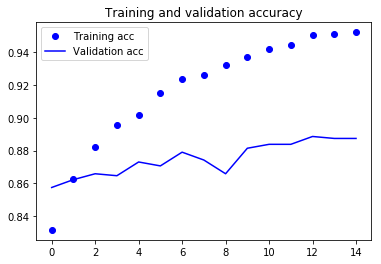

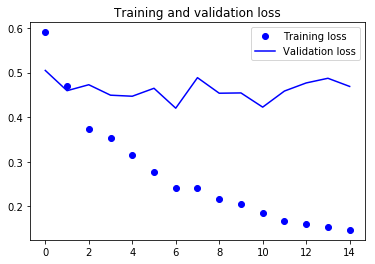

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

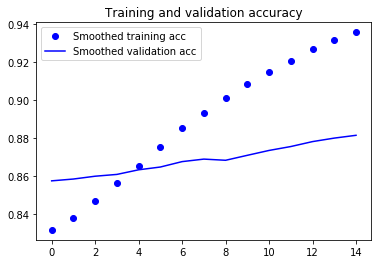

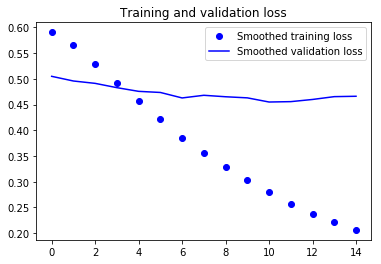

In [17]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(299,299),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("test_acc:",test_acc)

Found 836 images belonging to 133 classes.
test_acc: 0.8875501948188108
